### Тематическое моделирование 



__Важно__: Во второй половине ноутбука мы будем работать с библиотекой BigARTM, запускать которую удобнее всего в google colab (ниже будет код для установки библиотеки в colab), или с помощью Docker-образа. Если вы планируете работать с использованием Docker, сперва запустите его и работайте с ноутбуком внутри окружения, чтобы не делать предобработку данных дважды. Инструкция ниже.


Есть несколько сценариев работы с BigARTM, среди которых:

- установка библиотеки для Питона: инструкция [здесь](https://bigartm.readthedocs.io/en/stable/installation/index.html)

- запуск Docker образа с библиотекой

Если вы предпочтете второй сценарий, вам нужно:
1. Скачать и установить [Docker](https://www.docker.com/get-started) для своей ОС. Запустить Docker. 
2. Скачать образ (Dockerfile), в котором устанавливается большинство библиотек для анализа данных, Jupyter Notebook и сама BigARTM. Ссылка на файл лежит рядом со ссылкой на этот ноутбук в материалах недели.
3. Собрать образ: это можно сделать через командную строку (находясь в папке, где лежит скачанный в п.2 Dockerfile):

$ docker build -t artm .

$ docker run -p 8888:8888 artm

После выполнения этих двух команд запустится Jupyter Notebook, в командной строке будет написан путь к нему в таком формате:

Or copy and paste one of these URLs:
        http://de0ad378d760:8888/?token=5897bc15b494ca17f0d996763a8d05a71f1170af3455e96d
     or http://127.0.0.1:8888/?token=5897bc15b494ca17f0d996763a8d05a71f1170af3455e96d   

Откройте любой из URL, там поднят Jupyter Notebook с уже установленными библиотеками.

При работе не забывайте, что все ноутбуки, которые вы создаете внутри этого Docker образа, исчезнут, как только вы остановите Docker, поэтому перед окончанием работы скачайте ноутбук с результатом себе на компьютер.


Построим тематические модели для корпуса новостей Lenta.ru, с которым мы уже работали ранее.

In [ ]:
!wget https://github.com/yutkin/Lenta.Ru-News-Dataset/releases/download/v1.0/lenta-ru-news.csv.gz

In [1]:
!pip3 install corus

/usr/lib/python3/dist-packages/secretstorage/dhcrypto.py:15: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/usr/lib/python3/dist-packages/secretstorage/util.py:19: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 83 kB 927 kB/s eta 0:00:011


In [2]:
from corus import load_lenta

path = 'lenta-ru-news.csv.gz'
records = load_lenta(path)
next(records)

LentaRecord(
    url='https://lenta.ru/news/2018/12/14/cancer/',
    title='Названы регионы России с\xa0самой высокой смертностью от\xa0рака',
    text='Вице-премьер по социальным вопросам Татьяна Голикова рассказала, в каких регионах России зафиксирована наиболее высокая смертность от рака, сообщает РИА Новости. По словам Голиковой, чаще всего онкологические заболевания становились причиной смерти в Псковской, Тверской, Тульской и Орловской областях, а также в Севастополе. Вице-премьер напомнила, что главные факторы смертности в России — рак и болезни системы кровообращения. В начале года стало известно, что смертность от онкологических заболеваний среди россиян снизилась впервые за три года. По данным Росстата, в 2017 году от рака умерли 289 тысяч человек. Это на 3,5 процента меньше, чем годом ранее.',
    topic='Россия',
    tags='Общество',
    date=None
)

In [3]:
data = [(record.title, record.topic, record.text, record.tags) for record in records]

In [4]:
import pandas as pd
pd.set_option('display.max_columns', None)  
pd.set_option('display.expand_frame_repr', False)
pd.set_option('max_colwidth', -1)

In [5]:
data = pd.DataFrame(data, columns=['title','topic','text','tags'])

In [6]:
data.sample(3)

title     topic                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         text         tags
518679  Охранник герцогини Корнуольской покончил с собой          Мир       Один из охранников супруги принца Уэльского Камиллы Паркер Боулз в минувшие выходные был найден мертвым в собственном доме в графстве Уилтшир (Wiltshire), пишет The Times. По информации издания, 55-летний сержант Ричард Фаллер (Richard Fuller) работал начальником службы безопасности поместья Ray Mill, приобретенного герцогиней Корнуольской в 1996 году. Охранник погиб от выстрела в голову. Как предполагает полиция, это было самоубийство. Фаллер был женат, имел троих взрослых детей и в скором времени должен был выйти на пенсию. По словам коллег, офицер был вполне доволен жизнью и со стороны не было заметно никаких признаков депрессии. Камилла Паркер Боулз, которая в настоящее время вместе с принцем Чарльзом совершает круиз по Карибскому морю, уже извещена о происшествии. Как отмечает издание, герцогиня была "глубоко опечалена" смертью своего охранника.                                                                                                                                                                               Все        
18580   Полные женщины получат привилегии худых                   Ценности  Производитель одежды J Crew в коллаборации с американским инклюзивным брендом Universal Standard выпустил линейку одежды с вариантами размеров от XXS до 5XL. Об этом сообщает Mirror. В коллекцию вошли миди-платья, клетчатые топы, широкие брюки, юбки и джинсы. За шесть дней вещи были распроданы до последнего экземпляра. Целью основателей Universal Standard Алекса Вальдмана и Полины Векслер было обеспечить полных женщин точно таким же ассортиментом одежды, какой представлен для клиенток со стандартными размерами. Вальдмана и Векслер всегда возмущала ограниченность выбора для людей с избыточным весом, и они решили создать бренд, в котором вещи плюс-сайз не будут отличаться от основной коллекции. В июне британская плюс-сайз модель Фелисити Хэйуард дала отпор женщине, пристыдившей ее за слишком открытую одежду. «Никогда не знаешь, что переживает человек в тот момент, когда ты его обижаешь. Я рада, что ты попыталась задеть меня, а не юную девочку с кучей комплексов», — написала она в своем Twitter-аккаунте после случившегося.  Внешний вид
257124  Российскую чемпионку Европы дисквалифицировали за допинг  Спорт     Чемпионка Европы 2012 года в беге на 5000 метров Ольга Головкина дисквалифицирована на два года за нарушение антидопинговых правил. Об этом сообщает официальный сайт Российского антидопингового агентства (РУСАДА). Срок наказания спортсменки отсчитывается с 2 августа 2013 года. В чем именно заключается нарушение антидопингового законодательства со стороны Головкиной, не сообщается. В 2013 году бегунья приняла участие в чемпионате и кубке России, зимнем первенстве страны, командном чемпионате Европы и Универсиаде в Казани. В 2012 году россиянка участвовала в Олимпиаде в Лондоне. Головкина сумела пробить

In [7]:
len(data)

739350

In [8]:
data.topic.value_counts().head(15)

Россия               160518
Мир                  136680
Экономика            79538 
Спорт                64421 
Культура             53803 
Бывший СССР          53402 
Наука и техника      53136 
Интернет и СМИ       44675 
Из жизни             27611 
Дом                  21734 
Силовые структуры    19596 
Ценности             7766  
Бизнес               7399  
Путешествия          6408  
69-я параллель       1268  
Name: topic, dtype: int64

Для ускорения вычислений оставим тексты из 5 тем:

In [9]:
topics = ['Ценности', 'Бизнес', 'Путешествия']

data = data[data.topic.isin(topics)]
data.dropna(inplace=True)
len(data)

21573

### Предобработка


Все модели, с которыми мы будем работать далее, работают с предобработанными текстами, поэтому сперва проведем стандартную предобработку текста:

In [10]:
import re
import numpy as np
from nltk.corpus import stopwords
from tqdm.notebook import tqdm
from multiprocessing import Pool
# from pymystem3 import Mystem

In [11]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /home/pi/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [12]:
!pip3 install pymorphy2

/usr/lib/python3/dist-packages/secretstorage/dhcrypto.py:15: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/usr/lib/python3/dist-packages/secretstorage/util.py:19: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 55 kB 1.1 MB/s eta 0:00:011
     |████████████████████████████████| 8.2 MB 1.0 MB/s eta 0:00:01
  Created wheel for docopt: filename=docopt-0.6.2-py2.py3-none-any.whl size=13724 sha256=9bb9c48670268e5c448d9f62d7482f7daa9d5652d72dc9b9a2014e7c932dc5fa
  Stored in directory: /home/pi/.cache/pip/wheels/3f/2a/fa/4d7a888e69774d5e6e855d190a8a51b357d77cc05eb1c097c9
Successfully built docopt


In [13]:
import pymorphy2
morph = pymorphy2.MorphAnalyzer()

In [14]:
words_regex = re.compile('\w+')

def find_words(text, regex = words_regex):
    tokens =  regex.findall(text.lower())
    return [w for w in tokens if w.isalpha() and len(w) >= 3]


stopwords_list = stopwords.words('russian')

# mystem = Mystem()
# def lemmatize(words, lemmer = mystem, stopwords = stopwords_list):
#     lemmas = lemmer.lemmatize(' '.join(words))
#     return [w for w in lemmas if not w in stopwords 
#             and w.isalpha()]

def lemmatize(words, lemmer = morph, stopwords = stopwords_list):
    lemmas = [lemmer.parse(w)[0].normal_form for w in words]
    return [w for w in lemmas if not w in stopwords 
            and w.isalpha()]

def preprocess(text):
    return (lemmatize(find_words(text)))

In [15]:
data.text.iloc[1]

'Американский интернет-сервис Pinterest перечислил главные женские бьюти-тренды 2019 года. Самыми востребованными прическами станут короткая челка до бровей, а также окрашивание волос в лиловые или серебристые оттенки. Кроме того, по мнению экспертов, люди перестанут закрашивать естественную седину. Любимой декоративной косметикой могут стать однотонные яркие оттенки губной помады, блестящие жидкие блески для губ, а также средства для кожи с эффектом сияния. Вместо накладных искусственных ресниц женщины начнут пользоваться химической завивкой и окрашиванием собственных. Наиболее модной формой ногтей станет миндалевидная, а альтернативной лаку и другим покрытиям послужит порошковый маникюр\xa0дип-пудрой. Ранее в декабре британский ресурс Who What Wear перечислил модные тренды, которые будут особенно популярны в 2019 году. В список самой востребованной одежды вошли облегающие шорты-велосипедки, топы с американской проймой, платья в цветочек в винтажном стиле, а также яркие вещи с эффекто

In [16]:
print(preprocess(data.text.iloc[1]))

['американский', 'интернет', 'сервис', 'pinterest', 'перечислить', 'главный', 'женский', 'бьютя', 'тренд', 'год', 'самый', 'востребовать', 'причёска', 'стать', 'короткий', 'чёлка', 'бровь', 'также', 'окрашивание', 'волос', 'лиловый', 'серебристый', 'оттенок', 'кроме', 'мнение', 'эксперт', 'человек', 'перестать', 'закрашивать', 'естественный', 'седина', 'любимый', 'декоративный', 'косметика', 'мочь', 'стать', 'однотонный', 'яркий', 'оттенок', 'губный', 'помада', 'блестящий', 'жидкий', 'блеск', 'губа', 'также', 'средство', 'кожа', 'эффект', 'сияние', 'вместо', 'накладный', 'искусственный', 'ресница', 'женщина', 'начать', 'пользоваться', 'химический', 'завивка', 'окрашивание', 'собственный', 'наиболее', 'модный', 'форма', 'ноготь', 'стать', 'миндалевидный', 'альтернативный', 'лак', 'покрытие', 'послужить', 'порошковый', 'маникюр', 'дип', 'пудра', 'ранее', 'декабрь', 'британский', 'ресурс', 'who', 'what', 'wear', 'перечислить', 'модный', 'тренд', 'который', 'особенно', 'популярный', 'год',

Ниже мы оставим только случайные 10,000 текстов из нашей коллекции, чтобы ускорить вычисления:

In [17]:
data = data.sample(10000)
data.topic.value_counts()

Ценности       3610
Бизнес         3438
Путешествия    2952
Name: topic, dtype: int64

In [18]:
preprocessed_text = list(tqdm(map(preprocess, data['text']), total=len(data)))

In [19]:
data['text'] = preprocessed_text
data.sample(3)

title     topic                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      text            tags
123323  Британские дизайнеры сделали туфли с героями книги «Алиса в стране чудес»        Ценности  [британский, компания, irregular, choice, выпустить, новый, коллекция, обувь, посвятить, герой, книга, льюис, кэрролл, алиса, страна, чудо, это, сообщать, luxurylaunches, линейка, туфля, каблук, ботильон, балетки, изображение, герой, мультфильм, алиса, безумный, шляпник, ореховый, соня, червонный, королева, цена, обувь, варьироваться, доллар, это, второй, коллекция, британский, бренд, мультипликационный, персонаж, первый, выпустить, февраль, год, середина, январь, год, швейцарский, компания, swatch, представить, новый, коллекция, час, сезон, весна, лето, модель, посвятить, книга, алиса, страна, чудо, часы, wonderqueen, изобразить, червонный, королева, double, украсить, изображение, белый, кролик, циферблат, cat, изобразить, улыбаться, чеширский, кот]                                                                                                                                                                                                                                                  Стиль         
52542   В Москве завершил свою работу Второй бизнес-форум «Атланты»                      Бизнес    [москва, завершить, свой, работа, второй, бизнес, форум, атлант, говориться, пресс, релиз, поступить, редакция, лента, второй, день, бизнес, форум, атлант, открыться, пленарный, дискуссия, который, принять, участие, министр, экономический, развитие, максим, орешкин, губернатор, калининградский, область, антон, алиханов, уполномоченный, президент, защита, право, предприниматель, борис, титов, многие, слово, максим, орешкин, единственный, мочь, двигать, экономика, вперёд, это, конкуренция, министерство, экономический, развитие, представить, рассмотрение, российский, правительство, законопроект, контрольный, надзорный, деятельность, главный, задача, который, являться, превращение, контроль, надзор, инструмент, наказание, инструмент, предотвращение, нарушение, это, позволить, уменьшить, нагрузка, бизнес, позволить, динамично, развиваться, глава, калининградский, область, антон, алиханов, свой, выступление, отметить, именно, региональный, орган, власть, играть, важный, роль, улучшение, ...]  Деловой климат
146540  Минюст прокомментировал отмену решения о выплате 50 миллиардов акционерам ЮКОСа  Бизнес    [отмена, окружный, суд, гаага, решение, арбитраж, иск, бывший, акционер, юкос, россия, намерить, добиваться, компенсация, затрата, понести, связь, это, судебный, разбирательство, это, апрель, заявить, тасс, минюст, россия, гаагский, окружный, суд, присудить, россия, компенсация, судебный, издержка, рамка, процесс, отмена, арбитражный, решение, российский, федерация, перспектива, добиваться, компенсация, весь, затрата, понести, связь, инициировать, юкос, разбирательство, сообщить, ведомство, отметить, сегодняшний, решение, суд, снимать, арест, российский, актив, рубеж, однако, позволять, требовать, это, первый, очередь, франция,

## Модель LDA


Первая модель, которую мы рассмотрим, LDA - латентное размещение Дирихле. Воспользуемся реализацией из библиотеки gensim.

In [20]:
!pip3 install -U gensim

/usr/lib/python3/dist-packages/secretstorage/dhcrypto.py:15: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/usr/lib/python3/dist-packages/secretstorage/util.py:19: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
Defaulting to user installation because normal site-packages is not writeable


In [21]:
from gensim.models import *
from gensim import corpora

/home/pi/.local/lib/python3.6/site-packages/gensim/similarities/__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


Модель использует векторное представление документов, например, мешок слов (bow), поэтому сперва создадим словарь:

In [22]:
dictionary = corpora.Dictionary(data['text'])

dictionary.filter_extremes(no_below = 10, no_above = 0.9) # игнорируем слова, которые встречаются реже 10 раз или составляют более 0.9 словаря 
dictionary.save('lenta.dict')

Векторизуем документы:

In [23]:
corpus = [dictionary.doc2bow(text) for text in data['text']]
corpora.MmCorpus.serialize('lenta.model', corpus) 

Теперь можем обучать модель:

In [42]:
%time lda = ldamodel.LdaModel(corpus, id2word=dictionary, num_topics=5, chunksize=50, update_every=1, passes=2)

CPU times: user 12.2 s, sys: 19.7 ms, total: 12.2 s
Wall time: 12.3 s


Посмотрим на получившиеся темы:

In [43]:
lda.show_topics(num_topics=10, num_words=10, formatted=True)

[(0,
  '0.023*"год" + 0.017*"бренд" + 0.014*"компания" + 0.013*"коллекция" + 0.013*"модель" + 0.011*"одежда" + 0.010*"представить" + 0.008*"это" + 0.008*"новый" + 0.007*"который"'),
 (1,
  '0.017*"который" + 0.015*"это" + 0.008*"свой" + 0.008*"автомобиль" + 0.006*"также" + 0.006*"мир" + 0.005*"сообщать" + 0.005*"человек" + 0.005*"весь" + 0.005*"год"'),
 (2,
  '0.017*"авиакомпания" + 0.013*"самолёт" + 0.013*"это" + 0.012*"пассажир" + 0.012*"рейс" + 0.011*"аэропорт" + 0.008*"турист" + 0.007*"полёт" + 0.007*"который" + 0.007*"произойти"'),
 (3,
  '0.031*"год" + 0.023*"процент" + 0.016*"россия" + 0.015*"это" + 0.013*"тысяча" + 0.011*"рубль" + 0.011*"страна" + 0.009*"российский" + 0.008*"также" + 0.006*"составить"'),
 (4,
  '0.025*"компания" + 0.020*"год" + 0.012*"миллиард" + 0.011*"это" + 0.008*"российский" + 0.007*"россия" + 0.007*"который" + 0.007*"миллион" + 0.007*"доллар" + 0.006*"проект"')]

На полученные темы можно посмотреть, изобразив их на плоскости с помощью библиотеки __pyLDAvis__. Чтобы спроецировать темы на плоскость, внутри применяется PCA-разложение.

In [33]:
!pip install pyLDAvis

/usr/lib/python3/dist-packages/secretstorage/dhcrypto.py:15: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/usr/lib/python3/dist-packages/secretstorage/util.py:19: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
Defaulting to user installation because normal site-packages is not writeable


In [34]:
import pyLDAvis

In [35]:
import pyLDAvis.gensim_models as gensimvis

%time vis_data = gensimvis.prepare(lda, corpus, dictionary)
pyLDAvis.display(vis_data)

ModuleNotFoundError: No module named 'pyLDAvis.gensim_models'

Посмотрим на метрики качества получившейся модели: перплексию и среднюю когерентность:

In [44]:
print(lda.log_perplexity(corpus))


-7.661372010270969


In [45]:
print('Персплексия: ', np.exp(lda.log_perplexity(corpus)))

Персплексия:  0.0004706609239940993


In [46]:
coherence_model_lda = CoherenceModel(model=lda, texts=data['text'], dictionary=dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('Средняя когерентность: ', coherence_lda)

Средняя когерентность:  0.4864436267664215


Теперь можно подобрать оптимальное количество тем, опираясь на значение метрик:

In [39]:
import matplotlib.pyplot as plt
%matplotlib inline

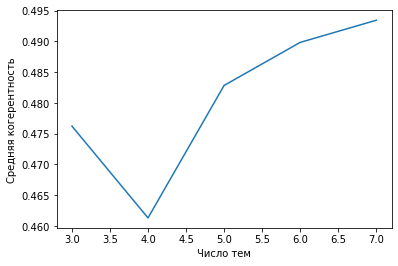

In [47]:
topics_list = [3, 4, 5, 6, 7]
coherences = []

for num in tqdm(topics_list):
    lda = ldamodel.LdaModel(corpus, id2word=dictionary, num_topics=num, chunksize=50, update_every=1, passes=2)
    coherences.append(CoherenceModel(model=lda, texts=data['text'], dictionary=dictionary, coherence='c_v').get_coherence())

plt.plot(topics_list, coherences)
plt.xlabel("Число тем")
plt.ylabel("Средняя когерентность")
plt.show()

Подробнее о метриках для оценки тематических моделей:
1. [Перплексия](http://qpleple.com/perplexity-to-evaluate-topic-models/)
2. Когерентность: [один пост](http://qpleple.com/topic-coherence-to-evaluate-topic-models/), [другой пост](https://towardsdatascience.com/evaluate-topic-model-in-python-latent-dirichlet-allocation-lda-7d57484bb5d0)

In [ ]:
lda_15 = ldamodel.LdaModel(corpus, id2word=dictionary, num_topics=15, chunksize=50, update_every=1, passes=2)
vis_data = gensimvis.prepare(lda_15, corpus, dictionary)
pyLDAvis.display(vis_data)

На другие способы визуализации тематических моделей можно посмотреть [здесь](https://www.machinelearningplus.com/nlp/topic-modeling-visualization-how-to-present-results-lda-models/#13.-t-SNE-Clustering-Chart).

## Библиотека BigARTM

Теперь попробуем построить модели с помощью библиотеки BigARTM. [Тут](https://github.com/bigartm/bigartm-book/blob/master/ARTM_example_RU.ipynb) и [тут](https://github.com/bigartm/bigartm-book/blob/master/ARTM_tutorial_RU.ipynb) можно посмотреть на примеры использования библиотеки. 

### Установка библиотеки в Google Colab

In [ ]:
!apt-get --yes update
!apt-get --yes install git make cmake build-essential libboost-all-dev
!apt-get --yes install python-numpy python-pandas python-scipy
!wget https://bootstrap.pypa.io/get-pip.py
!python get-pip.py
!pip install protobuf tqdm wheel
!git clone --branch=stable https://github.com/bigartm/bigartm.git

In [ ]:
%cd bigartm

In [ ]:
!mkdir build

In [ ]:
%cd build

In [ ]:
!cmake ..

In [ ]:
!make

In [ ]:
!make install

In [ ]:
!pip install python/bigartm*.whl


### Тематические модели в BigARTM

In [ ]:
import artm

In [ ]:
artm.version()

In [ ]:
artm.ARTM(num_topics=10).info

Чтобы работать с данными в библиотеке ARTM нужно сперва сделать препроцессинг (мы уже сделали его ранее) и записать данные в [одном из форматов](https://bigartm.readthedocs.io/en/v0.10.1/tutorials/datasets.html), с которыми умеет работать библиотека. Мы конвертируем данные в формат vowpal wabbit:

doc1 this text will be processed not as bag of words | Some_Author

In [ ]:
data['text'] = data['text'].apply(lambda x: ' '.join(x))

In [ ]:
i = 0
d = data.iloc[i]
d

In [ ]:
f'doc{i} {d.text} |topic {d.topic}'

In [ ]:
def convert_to_vw_format(index, row):
    return f'doc{index} {row.text} |topic {row.topic}'

In [ ]:
with open('lenta_wv.wv', 'w') as f:
    for index, row in data.iterrows():
        vw_string = convert_to_vw_format(index, row)
        f.write(vw_string)
        f.write('\n')

Далее нужно создать объект BatchVectorizer для данных, которые мы записали в формате vowpal wabbit:

In [ ]:
batch_vectorizer = artm.BatchVectorizer(data_path='lenta_wv.wv', 
                                        data_format='vowpal_wabbit',
                                        target_folder='lenta_batches')

Попробуем обучить модель LDA для 10 тем:

In [ ]:
%%time 
lda = artm.LDA(num_topics=10, alpha=0.1, beta=0.001, 
               cache_theta=True,
               num_document_passes=5, 
               dictionary=batch_vectorizer.dictionary)

lda.fit_offline(batch_vectorizer=batch_vectorizer, 
                num_collection_passes=10)

- __fit_offline__ (офлайн алгоритм): много проходов по коллекции, один проход по документу, одно обновление матрицы $\Phi$ в конце прохода по коллекции. __Лучше использовать при работе с небольшой коллекцией__.


- __fit_online__ (онлайн алгоритм) : один проход по коллекции, несколько проходов по документу, несколько обновлений матрицы $\Phi$ в конце прохода по коллекции. __Лучше использовать при работе с большой коллекцией, или коллекцией с часто меняющимеся темами.__



Можем посмотреть на все значения перплексии (для каждой итерации по коллекции из num_collection_passes=10):

In [ ]:
lda.perplexity_value

In [ ]:
import numpy as np

In [ ]:
np.log(lda.perplexity_last_value)

Посмотрим на топ-10 токенов для каждой из тем:

In [ ]:
top_tokens = lda.get_top_tokens(num_tokens=10)
for i, token_list in enumerate(top_tokens):
     print ('Topic #{0}: {1}'.format(i, token_list))

[Более подробный ноутбук про модель LDA](https://github.com/bigartm/bigartm-book/blob/master/LDA_tutorial_RU.ipynb)

Теперь построим базовую модель pLSA:

In [ ]:
plsa = artm.ARTM(num_topics=10, 
                 dictionary=batch_vectorizer.dictionary)

Добавим расчет перплексии:

In [ ]:
plsa.scores.add(artm.PerplexityScore(name='lenta_perplexity_score',
                 dictionary=batch_vectorizer.dictionary))

И TopTokensScore, чтобы взглянуть на самые вероятные слова в каждой теме:

In [ ]:
plsa.scores.add(artm.TopTokensScore(name='TopTokensScore', num_tokens=6))

In [ ]:
plsa.fit_offline(batch_vectorizer=batch_vectorizer,
                 num_collection_passes=20)

In [ ]:
plsa.score_tracker['lenta_perplexity_score'].value

In [ ]:
for topic_name in plsa.topic_names:
    print (topic_name + ': ', plsa.score_tracker['TopTokensScore'].last_tokens[topic_name])

Обратите внимание на слова с заглавной буквы: это поле topic из оригинальных данных.

Попробуем удалить из словаря слишком редкие и слишком частые токены:

In [ ]:
batch_vectorizer.dictionary.filter(min_tf=10, max_tf=5000)

In [ ]:
plsa = artm.ARTM(num_topics=10, 
                 dictionary=batch_vectorizer.dictionary)
plsa.scores.add(artm.PerplexityScore(name='lenta_perplexity_score',
                dictionary=batch_vectorizer.dictionary))

plsa.scores.add(artm.TopTokensScore(name='TopTokensScore', 
                                    num_tokens=6))
plsa.fit_offline(batch_vectorizer=batch_vectorizer, 
                 num_collection_passes=20)

In [ ]:
plsa.score_tracker['lenta_perplexity_score'].value

Стало заметно лучше :)

In [ ]:
for topic_name in plsa.topic_names:
    print (topic_name + ': ', plsa.score_tracker['TopTokensScore'].last_tokens[topic_name])

__Мультимодальные модели__

В библиотеке ARTM можно обучать мультимодальные модели, например, давайте попробуем обучить модель, которая будет учитывать поле topic из наших данных (мы специально записали его отдельно через | )

In [ ]:
# описываем модель и задаем веса классов
martm = artm.ARTM(num_topics=20,
                  class_ids={'@default_class': 1.0, '@topic': 5.0}, 
                  dictionary=batch_vectorizer.dictionary)

Добавим расчет метрик и регуляризаторы:

In [ ]:
martm.scores.add(artm.SparsityPhiScore(name='sparsity_phi_score',
                                       class_id='@topic'))

martm.scores.add(artm.TopTokensScore(name='TopTokensScore',
                                     num_tokens=6))


martm.scores.add(artm.PerplexityScore(name='lenta_perplexity_score',
                dictionary=batch_vectorizer.dictionary))

martm.regularizers.add(artm.DecorrelatorPhiRegularizer(name='decorrelator_phi_def',
                    class_ids=['@default_class']))

martm.regularizers.add(artm.DecorrelatorPhiRegularizer(name='decorrelator_phi_lab',
                        class_ids=['@topic']))

In [ ]:
martm.fit_offline(batch_vectorizer=batch_vectorizer, 
                  num_collection_passes=10)

In [ ]:
martm.score_tracker['lenta_perplexity_score'].value

In [ ]:
for topic_name in martm.topic_names:
    print (topic_name + ': ', martm.score_tracker['TopTokensScore'].last_tokens[topic_name])

Сравним обычную модель pLSA и модель mARTM:

In [ ]:
model_plsa = artm.ARTM(topic_names=['topic_{}'.format(i) for i in range(20)],
                       scores=[artm.PerplexityScore(name='PerplexityScore',
                       dictionary=batch_vectorizer.dictionary)],
                       cache_theta=True)

model_martm = artm.ARTM(topic_names=['topic_{}'.format(i) for i in range(20)],
                       scores=[artm.PerplexityScore(name='PerplexityScore',
                       dictionary=batch_vectorizer.dictionary)],
                       regularizers=[artm.SmoothSparseThetaRegularizer(name='SparseTheta', tau=-0.15)],
                       cache_theta=True,
                        class_ids={'@default_class': 1.0, '@topic': 5.0}, 
                  dictionary=batch_vectorizer.dictionary)

In [ ]:
model_martm.scores.add(artm.SparsityPhiScore(name='SparsityPhiScore'))
model_martm.scores.add(artm.SparsityThetaScore(name='SparsityThetaScore'))

model_plsa.scores.add(artm.SparsityPhiScore(name='SparsityPhiScore'))
model_plsa.scores.add(artm.SparsityThetaScore(name='SparsityThetaScore'))

In [ ]:
model_plsa.initialize(dictionary=batch_vectorizer.dictionary)
model_martm.initialize(dictionary=batch_vectorizer.dictionary)

In [ ]:
model_martm.num_document_passes = 1
model_plsa.num_document_passes = 1

model_martm.fit_offline(batch_vectorizer=batch_vectorizer, 
                        num_collection_passes=20)
model_plsa.fit_offline(batch_vectorizer=batch_vectorizer,
                       num_collection_passes=20)

In [ ]:
import matplotlib.pyplot as plt

def print_measures(model_plsa, model_martm):

    print ('Perplexity: {0:.3f} (pLSA) vs. {1:.3f} (mARTM)'.format(
        model_plsa.score_tracker['PerplexityScore'].last_value,
        model_martm.score_tracker['PerplexityScore'].last_value))

    plt.plot(range(model_plsa.num_phi_updates), model_plsa.score_tracker['PerplexityScore'].value, 'b--',
             range(model_martm.num_phi_updates), model_martm.score_tracker['PerplexityScore'].value, 'r--', linewidth=2)
    
    plt.xlabel('Iterations count')
    plt.ylabel('pLSA perp. (blue), mARTM perp. (red)')
    plt.grid(True)
    plt.show()
    
print_measures(model_plsa, model_martm)